In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [4]:
# Đường dẫn đến file dữ liệu đã được merge và xử lý
df = pd.read_csv("../data/merge_price_sentiment/FPT_final_training_data.csv")

# Hiển thị vài dòng đầu để kiểm tra
df.head()


,Date,Change,Percent Change,Open,High,Low,Close,Average,Volume,Value,negative,neutral,positive,total_articles,Target_Label
0,2022-04-12,1.3,1.20%,109.0,111.5,106.6,109.8,108.32,"3,678,500","402,432,400",0.0,0.0,0.0,0.0,1.0
1,2022-04-13,5.3,4.83%,110.0,115.1,109.8,115.1,112.76,"3,513,600","397,083,699",0.0,0.0,0.0,0.0,1.0
2,2022-04-14,1.5,1.30%,115.2,118.9,115.2,116.6,117.27,"5,399,800","641,863,140",0.0,0.0,0.0,0.0,-1.0
3,2022-04-15,-1.6,-1.37%,115.1,117.9,114.0,115.0,115.62,"4,074,500","479,736,476",0.0,0.0,0.0,0.0,1.0
4,2022-04-18,0.5,0.43%,115.0,118.6,114.0,115.5,116.60,"3,847,800","451,816,033",0.0,0.0,0.0,0.0,-1.0


In [5]:
# Bỏ các dòng không có nhãn
df = df.dropna(subset=["Target_Label"])

# Bỏ các dòng có nhãn = 0 (giá không đổi)
df = df[df["Target_Label"] != 0]

# Reset lại chỉ số dòng
df = df.reset_index(drop=True)

print(f"Tổng số mẫu còn lại sau lọc: {len(df)}")


Tổng số mẫu còn lại sau lọc: 702


In [6]:
features = ["positive", "neutral", "negative", "total_articles"]
X = df[features]
y = df["Target_Label"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Số mẫu huấn luyện: {len(X_train)}")
print(f"Số mẫu kiểm tra: {len(X_test)}")


Số mẫu huấn luyện: 561
Số mẫu kiểm tra: 141


In [8]:
model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
y_pred = model.predict(X_test)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

        -1.0       0.46      0.48      0.47        66
         1.0       0.52      0.49      0.51        75

    accuracy                           0.49       141
   macro avg       0.49      0.49      0.49       141
weighted avg       0.49      0.49      0.49       141



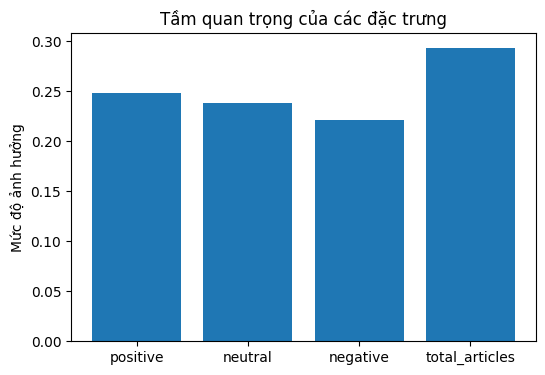

In [10]:
importances = model.feature_importances_

plt.figure(figsize=(6, 4))
plt.bar(features, importances)
plt.title("Tầm quan trọng của các đặc trưng")
plt.ylabel("Mức độ ảnh hưởng")
plt.show()


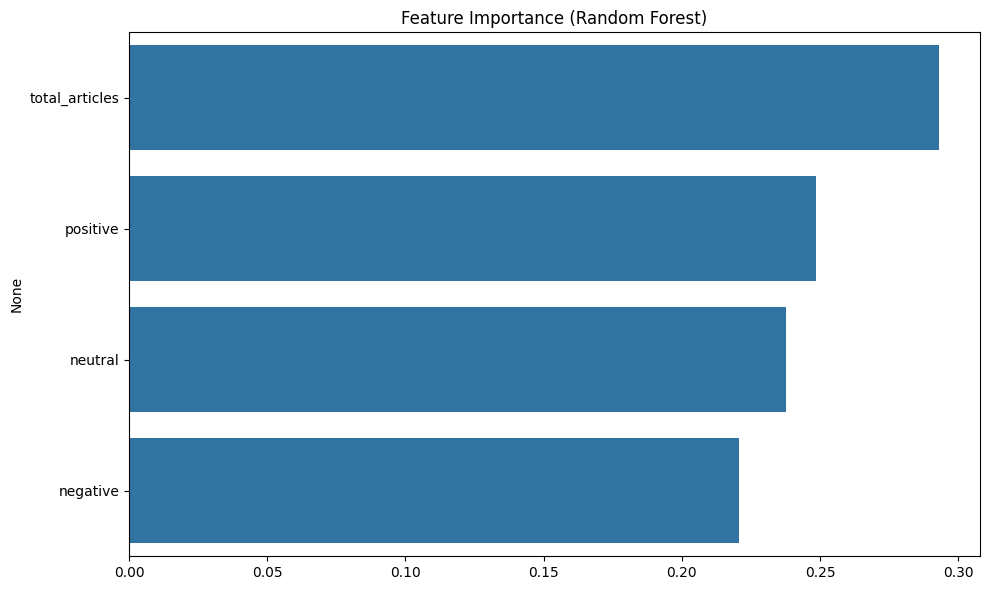

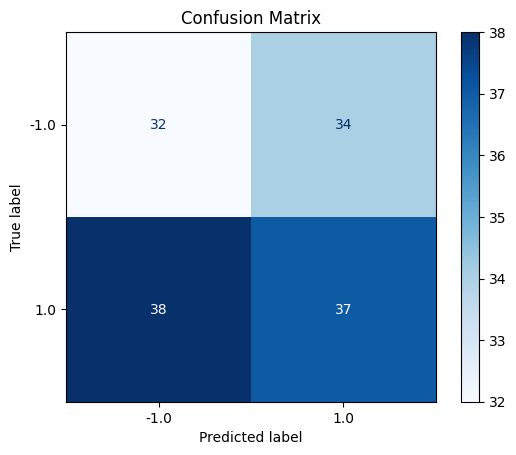

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.46      0.48      0.47        66
         1.0       0.52      0.49      0.51        75

    accuracy                           0.49       141
   macro avg       0.49      0.49      0.49       141
weighted avg       0.49      0.49      0.49       141



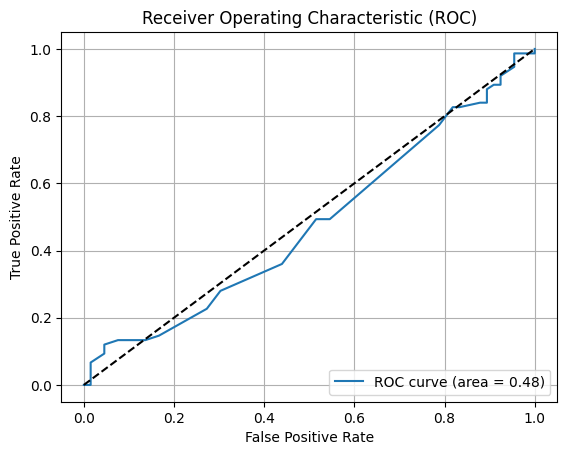

In [11]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import numpy as np

# 1. Biểu đồ Feature Importance
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.tight_layout()
plt.show()

# 2. Ma trận nhầm lẫn
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report (text)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. ROC Curve (nếu là bài toán nhị phân)
if len(model.classes_) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()